## 마켓과 머신러닝
길이, 무게 특성을 이용하여 도미와 빙어를 구분하는 프로그램 만들기

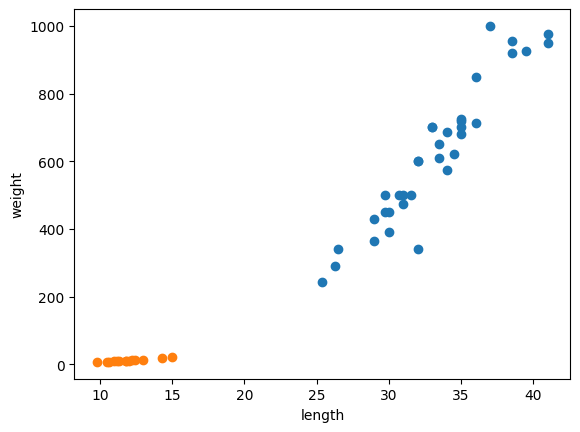

In [ ]:
# 도미(bream)와 빙어(smelt) 데이터 입력

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.2, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                 700.0,700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
                 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 확인을 위한 산점도 그래프 출력
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 도미와 빙어 데이터 합치기
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

# 리스트 내포(학습 샘플 저장)
fish_data = [[l, w] for l, w in zip(length, weight)]

# 정답데이터 0(빙어)과 1(도미)로 이진분류
fish_target = [1]*35 +[0]*14




In [ ]:
# k-최근접 이웃 알고리즘을 통한 예측

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) # fit 메서드: 입력된 데이터들로 머신러닝 모델(kn) 훈련
kn.score(fish_data, fish_target) # 예측 결과의 정확도 확인(0.0~1.0)

kn. predict([[30, 600]]) # 결과값: array([1]) (도미)

kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
# 훈련 세트/테스트 세트 준비(모델의 훈련 정도를 확인하는 목적)
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_data[35:]

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn= kn.fit(train_input, train_target)

kn.score(test_input, test_target)
# -> 샘플링 편향(훈련세트-도미/테스트 세트-빙어)으로 인한 테스트 실패 = 0



In [ ]:
# 넘파이를 이용한 2차원 배열 변환(predict 메서드가 array를 사용하기 때문)
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

# 데이터 섞기
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

#데이터 나누고 확인
import matplotlib.pyplot as plt
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝 프로그램 수정 확인
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 결과: 1(성공)

# 2장
특정 데이터가 있을 때 도미인지 빙어인지 확인하는 프로그램


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
# colummn_stack 함수를 이용하여 주어진 두 배열을 각 열로 만들어 합쳐준다 <-> row_stack

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# np.ones/zeros(배열 크기) : 각각 1과 0으로 이루어진 배열을 생성함 *np.full(크기, 내용)

# 사이킷런으로 데이터 나누기: stratify 매개변수(타겟
값을 적절히 섞어줌)
8gfrom sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]])) # 0 (빙어값으로 인식)

distances, indexes = kn.kneighbors([[25,150]])
print(distances)


[0.]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


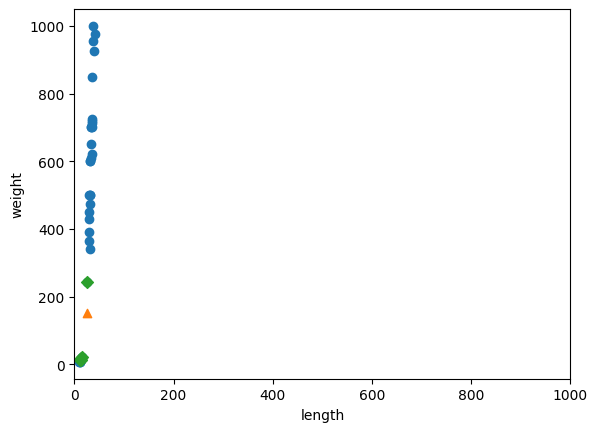

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


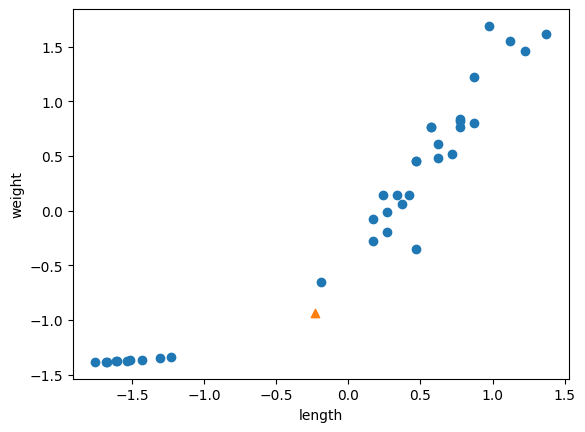

In [ ]:
# x, y축의 스케일 조정 (두 개 이상의 특성이 차이가 큰 범위를 가지는 경우 수행)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 표준 점수로 바꾸기
mean = np.mean(train_input, axis=0) # axis=1일 경우 행(샘플) 별로 계산
std = np.std(train_input, axis=0) # 표준편차
print(mean, std)

train_scaled = (train_input - mean) / std # 표준점수

new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 2. 회귀 알고리즘과 모델 규제
* k-최근접 이웃 회귀 ✔️
* 선형 회귀
* 특성 공학과 규제

회귀 argression
- 이진분류에서의 타깃은 0, 1로 분류
- 회귀분류에서의 타깃은 임의의 숫자(실제 데이터)
> 회귀란 임의의 값을 예측하는 방법

k-최근접 이웃 회귀
- k-최근접 이웃 분류: 최근접 이웃 중 다수값 선택
- k-최근접 이웃 회귀: 최근접 이웃의 평균값으로 예측


In [ ]:
# 농어의 무게 예측하기
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트 준비
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1) #1차원 배열로 되어있는 데이터를 2차원 배열로 배치
test_input = test_input.reshape(-1, 1)

# 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor # 회귀모델
from sklearn.metrics import mean_absolute_error # 평균절댓값 오차

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)  # 과소적합 현상
knr.score(test_input, test_target)

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction) # 과대적합 현상
print(mae)

# 과소/과대 적합 해결
# 이웃(knr.n_neoghbors)의 개수가 줄어들면-과대적합, 많아지면-과소적합 발생 O
# 두 기준 사이에서 결과값의 차이가 크지 않고, 정확도가 높은 적절치를 찾아가는 것이 중

knr.n_neoghbors =  3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 2. 회귀 알고리즘과 모델 규제
* k-최근접 이웃 회귀
* 선형 회귀 ✔️
* 특성 공학과 규제

선형회귀 종류: 로지스틱 회귀, 신경망 등

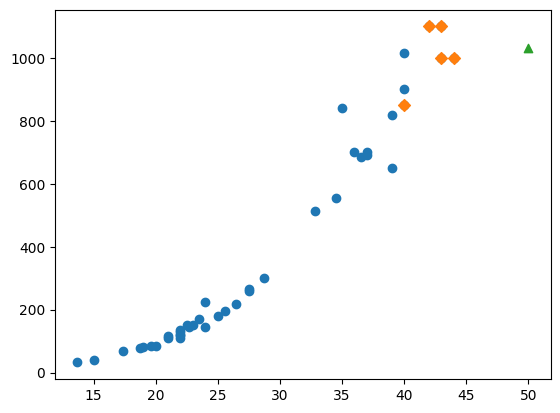

[1241.83860323]
[39.01714496] -709.0186449535477


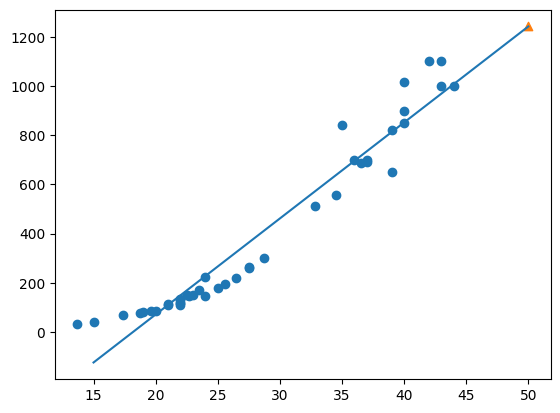

0.939846333997604
0.8247503123313558
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


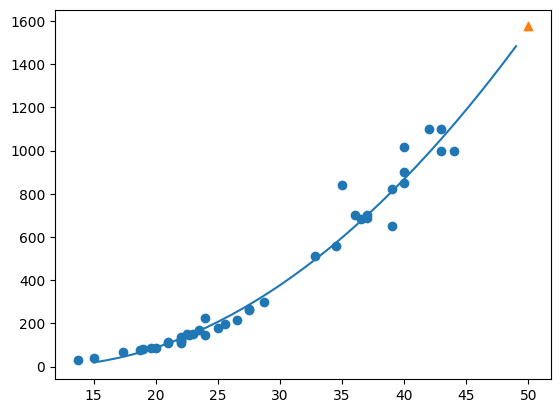

0.9706807451768623
0.9775935108325122


In [60]:
# 50cm 농어의 이웃 문제
distances, indexes = knr.kneighbors([[50]]) # 이웃값 구하기
plt.scatter(train_input, train_target) # 훈련세트의 산점도
plt.scatter(train_input[indexes], train_target[indexes],marker='D') #훈련 세트 중 이웃 샘플만 포함한 산점도

#50센티 농어데이터
plt.scatter(50,1033, marker="^")
plt.show()

# 선형회귀 모델 활용
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

# 훈련 세트 산점도
plt.scatter(train_input, train_target)

#15에서 50까지의 1차 방정식
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8, marker="^")
plt.show()

print(lr.score(train_input, train_target)) #0.939846333997604
print(lr.score(test_input, test_target)) #0.8247503123313558
# 훈련세트와 테스트세트의 정확도 차이가 큼 -> 조정 필요

# 다항 회귀: 농어 무게 = a*길이^ + b*길이+c
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input ))

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

# 학습한 다항회귀 곡선 그리기
point = np.arange(15, 50) # 구간별 직선을 위한 15~49 정수 배열
plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6* point + 116.05)
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))



# 2. 회귀 알고리즘과 모델 규제
* k-최근접 이웃 회귀
* 선형 회귀
* 다중 회귀
* 특성 공학과 규제

특성공학: 기존 특성들을 조합하여 새로운 특성을 추가/변경하는 방법
전통적 머신러닝은 특성공학에 영향을 많이 받는 편(머신러닝 모델은 특성이 많을 수록 복잡한 문제 해결에 용이해짐. 따라서 PolynomialFeatures 클래스를 통해 새로운 특성을 만들어 사용할 때가 있는데, 각 특성에 어떤 의미를 부여하기보다는 문제 해결을 위한 용도로 여기면 됨...

[[1. 2. 3. 4. 6. 9.]]
(42, 2)
0.9706807451768623
0.9775935108325122
(42, 55)
0.7970207432113835
-2.8512520309269873
0.9739708196580525
0.9812669219187933


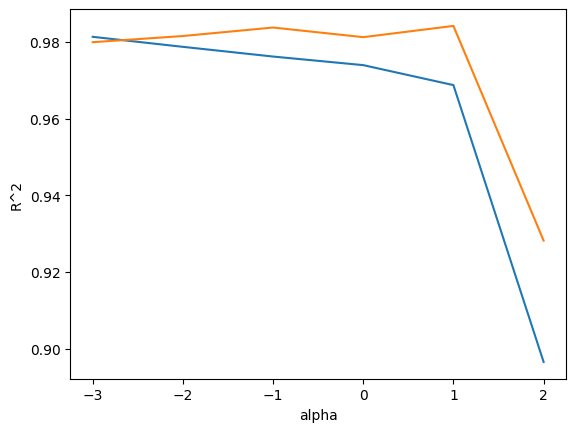

0.9762105489846842
0.9837809941082094


In [79]:
# 다항 특성 만들기 예시
from sklearn.preprocessing import PolynomialFeatures # <-자동으로 만들어주는 역할

# degree=2
poly = PolynomialFeatures()
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]])) # 가상의 샘플 데이터 입력
# -> [[1. 2. 3. 4. 6. 9.]]


# 판다스로 데이터 준비 *판다스: 파이썬 과학 라이브러리의 핵심 중 하나로, 데이터프레임 사용

import pandas as pd
from sklearn.linear_model import LinearRegression

df =  pd.read_csv('http://bit.ly/perch_csv')
perch_full = df.to_numpy()
# print(perch_full)

poly = PolynomialFeatures(include_bias=False) #절편에 대한 특성 제외하기 위한 옵션

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape) #(42, 9) 길이, 무게, 두께의 세가지에서 9가지로 늘어난 것 확인 가능

poly.get_feature_names_out() #get_feature_names_out 메서드 버전 업데이트로 변경됨!!
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2'] #9개의 특성이 어떤 방식으로 만들어졌는지 확인

test_poly = poly.transform(test_input)
#이번 테스트 세트에는 변경사항이 없지만, 훈련세트가 변경되면 테스트 세트도 업데이트하는 습관 들일 것.

lr = LinearRegression()
lr.fit(train_poly, train_target) #특성이 늘어났을 뿐 타깃은 그대로

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#더 많은 특성 만들기!!
poly = PolynomialFeatures(degree=55, include_bias=False) # 영상에는 5라고 나와있음 ㅡㅡ

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#규제 전에 표준화하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀의 규제: 가중치의 제곱을 벌칙으로?사용 =L2규제
# =>선형회귀에 L2규제가 적용된 것=릿지회귀 (다른 클래스에 적용시는 그냥 L2규제)

from sklearn.linear_model import Ridge

ridge = Ridge() # 매개변수 alpha=1(기본값)<-의 적정한 값을 찾는 것: 하이퍼파라미터 탐색(규제강도 찾기)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

#규제 강도 찾기
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha) #릿지 모델 만들기
  ridge.fit(train_scaled, train_target) #릿지 모델 훈련
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.418e+02, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


0.9747395720050562
0.9823707459291223
0.9706958377201608
0.9783240873140151
52


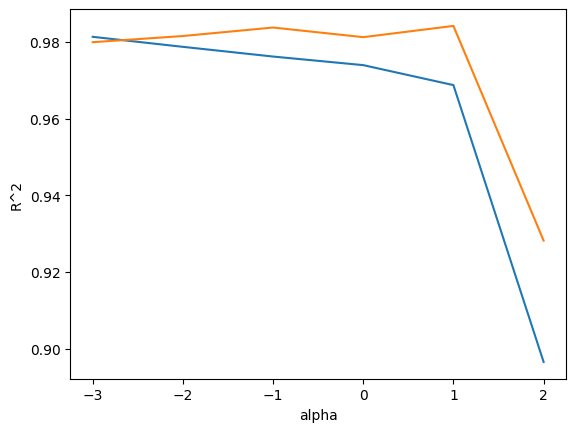

In [83]:
# 라쏘 회귀 (L1 규제) 가중치의 절댓값을 사용

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()